<a href="https://colab.research.google.com/github/Schiessl/AgoraVAI/blob/main/Importa_S%C3%A9rie_Hist%C3%B3rica_B3_Todas_as_a%C3%A7%C3%B5es_e_op%C3%A7%C3%B5es_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa bibliotecas

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


#Define caminho e carrega arquivo

### Série Histórica diária B3
Arquivo disponível em:
https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

Para inserir o dado mais atual, baixe a série daqui:
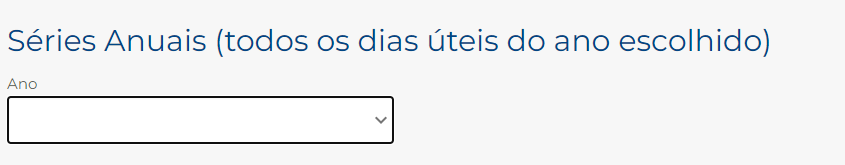
### Layout do arquivo
Arquivo disponível em: https://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf


In [5]:
layout = [
    ("tipo_registro", 2, 'str'),
    ("data_pregao", 8, 'datetime'),
    ("cod_bdi", 2, 'str'),
    ("cod_negociacao", 12, 'str'),
    ("tipo_mercado", 3, 'str'),
    ("nome_empresa", 12, 'str'),
    ("especificacao_papel", 10, 'str'),
    ("prazo_dias_merc_termo", 3, 'str'),
    ("moeda_referencia", 4, 'str'),
    ("preco_abertura", 13, 'float'),
    ("preco_maximo", 13, 'float'),
    ("preco_minimo", 13, 'float'),
    ("preco_medio", 13, 'float'),
    ("preco_ultimo_negocio", 13, 'float'),
    ("preco_melhor_oferta_compra", 13, 'float'),
    ("preco_melhor_oferta_venda", 13, 'float'),
    ("numero_negocios", 5, 'int'),
    ("quantidade_papeis_negociados", 18, 'int'),
    ("volume_total_negociado", 18, 'float'),
    ("preco_exercicio", 13, 'float'),
    ("indicador_correcao_precos", 1, 'str'),
    ("data_vencimento", 8, 'datetime'),
    ("fator_cotacao", 7, 'int'),
    ("preco_exercicio_pontos", 13, 'float'),
    ("codigo_isin", 12, 'str'),
    ("num_distribuicao_papel", 3, 'str')
]


In [7]:
def importar_arquivo_b3(caminho_arquivo, nrows=None):
    """
    Função para importar dados de um arquivo no formato B3 (BM&FBOVESPA) e verificar a consistência.

    Parâmetros:
    - caminho_arquivo (str): O caminho do arquivo a ser importado.
    - nrows (int or None): Número de linhas a serem lidas do arquivo. Se None, lê todas as linhas.

    Retorna:
    - pd.DataFrame: Um DataFrame contendo os dados importados.

    A função lê o arquivo, realiza a importação para um DataFrame e verifica a consistência comparando a quantidade
    de registros importados com a quantidade informada no trailer.
    """
    inicio = datetime.now()
    print('Inicio da leitura:', inicio)

    # Definir os tipos de dados para cada coluna
    dtype_mapping = {
        field[0]: (
            'datetime64[ns]' if field[2] == 'datetime' else
            (float if field[2] == 'float' else
            (int if field[2] == 'int' else 'str'))
        ) for field in layout
    }

    largura_campo = [field[1] for field in layout]

    # Ler o arquivo diretamente com Pandas, lendo apenas as primeiras linhas se nrows for especificado
    df = pd.read_fwf(
        caminho_arquivo,
        widths=largura_campo,
        dtype=dtype_mapping,
        nrows=nrows,  # Número de linhas a serem lidas
        skipheader=1, # pula o header
        skipfooter=1 if nrows is None else 0 # pula o trailer quando lê arquivo completo
    )

    # Renomear as colunas
    df.columns = [field[0] for field in layout]

    # Converter a colunas com datas para datetime64[ns]
    df['data_pregao'] = pd.to_datetime(df['data_pregao'], format='%Y%m%d', errors='coerce')
    df['data_vencimento'] = pd.to_datetime(df['data_vencimento'], format='%Y%m%d', errors='coerce')
    # Arredondar campos para duas casas decimais
    decimal_fields = [field[0] for field in layout if field[2] == 'float']
    df[decimal_fields] = df[decimal_fields] / 100
    # Formatar o campo 'preco_exercicio_pontos' com 6 casas decimais
    df['preco_exercicio_pontos'] = df['preco_exercicio_pontos'] / 1e6
    # Aplicar formatação específica apenas para o campo volume_total_negociado
    df['volume_total_negociado'] = df['volume_total_negociado'].apply(lambda x: '{:.2f}'.format(x))

    # Exibir a quantidade de linhas importadas
    # print('Quantidade de linhas importadas:', len(df))

    if nrows is None:
        # Se lendo todas as linhas, verificar o trailer
        # Exibir a quantidade lida no trailer (posições 32 a 42)
        with open(caminho_arquivo, 'r') as file:
            lines = file.readlines()
            trailer = lines[-1]
            quantidade_lida_no_trailer = int(trailer[32:42])-2  # exclui header e trailer

        if len(df) == quantidade_lida_no_trailer:
            print(f'\n#### Arquivo importado com sucesso! - {len(df):,.0f} registros em {(datetime.now() - inicio)} ####')
        else:
            print(f'\n---- Arquivo não foi importado corretamente! ----')
            print(f'---- Foram importadas {len(df):,.0f} linhas, mas o trailer indica {quantidade_lida_no_trailer} linhas. ----')
    else:
            print(f'\n---- Foram importadas {len(df):,.0f} linhas. ----')

    print('\nFim da leitura:', datetime.now())
    return df

# Exemplo de uso da função, lendo apenas as primeiras 10 linhas
caminho_do_arquivo = '/content/COTAHIST_A2024.TXT'
# df = importar_arquivo_b3(caminho_do_arquivo, nrows=3)
df = importar_arquivo_b3(caminho_do_arquivo,)


Inicio da leitura: 2024-02-08 13:08:17.876486

#### Arquivo importado com sucesso! - 178,030 registros em 0:00:05.862195 ####

Fim da leitura: 2024-02-08 13:08:23.738834


In [8]:
df.dtypes


tipo_registro                            int64
data_pregao                     datetime64[ns]
cod_bdi                                  int64
cod_negociacao                          object
tipo_mercado                             int64
nome_empresa                            object
especificacao_papel                     object
prazo_dias_merc_termo                  float64
moeda_referencia                        object
preco_abertura                         float64
preco_maximo                           float64
preco_minimo                           float64
preco_medio                            float64
preco_ultimo_negocio                   float64
preco_melhor_oferta_compra             float64
preco_melhor_oferta_venda              float64
numero_negocios                          int64
quantidade_papeis_negociados             int64
volume_total_negociado                  object
preco_exercicio                        float64
indicador_correcao_precos                int64
data_vencimen

In [9]:
df

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,nome_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,indicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,2024-01-02,2,AALR3,10,ALLIAR,ON NM,NaN,R$,10.20,...,1993,430400,4014875.00,0.00,0,NaT,1,0.0,BRAALRACNOR6,102
1,1,2024-01-02,2,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,23.98,...,8964,1944700,44947308.00,0.00,0,NaT,1,0.0,BRABCBACNPR4,145
2,1,2024-01-02,2,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,13.72,...,16587,11690200,159839111.00,0.00,0,NaT,1,0.0,BRABEVACNOR1,127
3,1,2024-01-02,2,BBDC3,10,BRADESCO,ON EJ N1,NaN,R$,15.26,...,6674,4545600,68576854.00,0.00,0,NaT,1,0.0,BRBBDCACNOR1,764
4,1,2024-01-02,2,ALPA3,10,ALPARGATAS,ON N1,NaN,R$,10.11,...,20,2900,29120.00,0.00,0,NaT,1,0.0,BRALPAACNOR0,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178025,1,2024-01-26,82,YDUQO220,80,YDUQE,ON NM,0.0,R$,2.90,...,1,100,290.00,22.00,0,2024-03-15,1,0.0,BRYDUQACNOR3,104
178026,1,2024-01-26,82,YDUQP182,80,YDUQE,ON NM,0.0,R$,1.10,...,4,1300,1445.00,18.25,0,2024-04-19,1,0.0,BRYDUQACNOR3,104
178027,1,2024-01-26,82,YDUQX19,80,YDUQE,ON NM,0.0,R$,2.35,...,1,400,940.00,18.73,0,2024-12-20,1,0.0,BRYDUQACNOR3,103
178028,1,2024-01-26,62,ZAMP3T,30,ZAMP S.A.,ON,31.0,R$,5.21,...,2,5000,26082.65,0.00,0,NaT,1,0.0,BRZAMPACNOR5,100


# Tipos de Mercado

*   **010** VISTA
*   **012** EXERCÍCIO DE OPÇÕES DE COMPRA,
*   **013** EXERCÍCIO DE OPÇÕES DE VENDA,
*   **017** LEILÃO,
*   **020** FRACIONÁRIO,
*   **030** TERMO,
*   **050** FUTURO COM RETENÇÃO DE GANHO,
*   **060** FUTURO COM MOVIMENTAÇÃO CONTÍNUA,
*   **070** OPÇÕES DE COMPRA,
*   **080** OPÇÕES DE VENDA


In [10]:
def filtrar_tipo_mercado(df):
    """
    Função para filtrar um DataFrame com base no tipo de mercado.

    Parâmetros:
    - df (pd.DataFrame): O DataFrame contendo os dados a serem filtrados.

    Retorna:
    - pd.DataFrame: Um DataFrame contendo apenas os registros do tipo mercado à vista.
    - pd.DataFrame: Um DataFrame contendo apenas os registros do tipo opções.
    """
    # Filtrar mercado à vista (tipo_mercado = 10)
    mercado_a_vista_df = df[df['tipo_mercado'] == 10]

    # Filtrar opções (tipo_mercado igual a 70 ou 80)
    opcoes_df = df[df['tipo_mercado'].isin([70, 80])]

    return mercado_a_vista_df, opcoes_df

# Aplicar a função de filtragem
mercado_a_vista, opcoes = filtrar_tipo_mercado(df)


#Mercado a vista - Ações

In [11]:
mercado_a_vista

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,nome_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,indicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,2024-01-02,2,AALR3,10,ALLIAR,ON NM,NaN,R$,10.20,...,1993,430400,4014875.00,0.0,0,NaT,1,0.0,BRAALRACNOR6,102
1,1,2024-01-02,2,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,23.98,...,8964,1944700,44947308.00,0.0,0,NaT,1,0.0,BRABCBACNPR4,145
2,1,2024-01-02,2,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,13.72,...,16587,11690200,159839111.00,0.0,0,NaT,1,0.0,BRABEVACNOR1,127
3,1,2024-01-02,2,BBDC3,10,BRADESCO,ON EJ N1,NaN,R$,15.26,...,6674,4545600,68576854.00,0.0,0,NaT,1,0.0,BRBBDCACNOR1,764
4,1,2024-01-02,2,ALPA3,10,ALPARGATAS,ON N1,NaN,R$,10.11,...,20,2900,29120.00,0.0,0,NaT,1,0.0,BRALPAACNOR0,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,1,2024-01-26,36,BIAU39,10,GOLD TRUST,DRE,NaN,R$,46.97,...,13,1235,58106.90,0.0,0,NaT,1,0.0,BRBIAUBDR008,102
31786,1,2024-01-26,36,BIBB39,10,ICE BIOTECH,DRE,NaN,R$,44.39,...,4,6016,267050.24,0.0,0,NaT,1,0.0,BRBIBBBDR006,113
31787,1,2024-01-26,36,BICL39,10,BKR GL CLEAN,DRE,NaN,R$,34.27,...,2,10,342.70,0.0,0,NaT,1,0.0,BRBICLBDR003,106
31788,1,2024-01-26,36,BIDR39,10,BKR SELFDRIV,DRE,NaN,R$,49.50,...,2,2,98.67,0.0,0,NaT,1,0.0,BRBIDRBDR008,104


In [12]:
mercado_a_vista_filtro = mercado_a_vista.loc[:, ['data_pregao', 'cod_negociacao', 'especificacao_papel', 'preco_ultimo_negocio', 'volume_total_negociado']]
mercado_a_vista_filtro = mercado_a_vista_filtro.set_index('data_pregao')
mercado_a_vista_filtro


,cod_negociacao,especificacao_papel,preco_ultimo_negocio,volume_total_negociado
data_pregao,,,,
2024-01-02,AALR3,ON NM,8.50,4014875.00
2024-01-02,ABCB4,PN EJS N2,22.88,44947308.00
2024-01-02,ABEV3,ON EJ,13.71,159839111.00
2024-01-02,BBDC3,ON EJ N1,15.11,68576854.00
2024-01-02,ALPA3,ON N1,10.00,29120.00
...,...,...,...,...
2024-01-26,BIAU39,DRE,47.30,58106.90
2024-01-26,BIBB39,DRE,44.39,267050.24
2024-01-26,BICL39,DRE,34.27,342.70


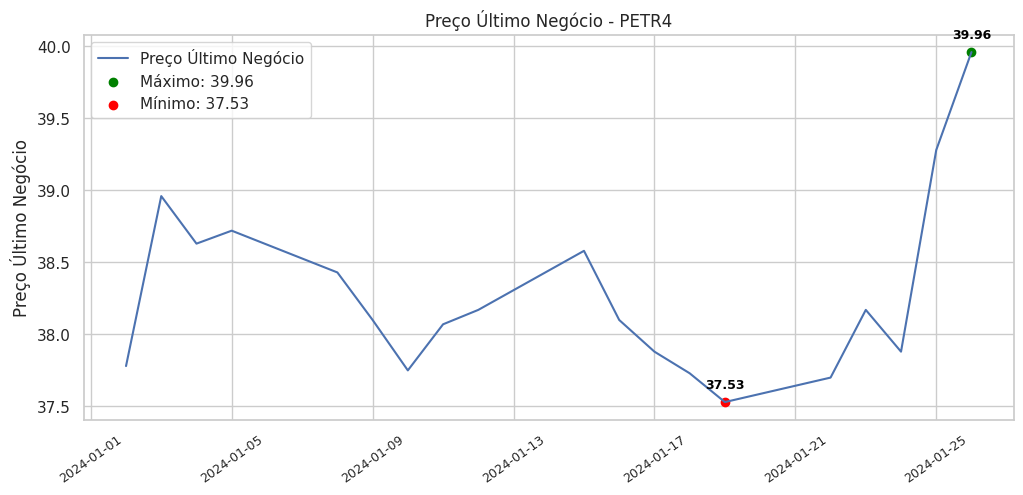

In [14]:
def plotar_grafico(df, codigo_negociacao, incluir_tendencia=False):
    # Tratar o código de negociação para maiúsculas
    codigo_negociacao = codigo_negociacao.upper()

    # Filtrar o DataFrame pelo código de negociação
    df_codigo = df[df['cod_negociacao'] == codigo_negociacao]

    # Configurar o estilo do seaborn para melhorar a aparência do gráfico
    sns.set(style="whitegrid")
    # Criar o gráfico
    plt.figure(figsize=(12, 5))
    # Adicionar o gráfico de linhas
    sns.lineplot(x=df_codigo.index, y='preco_ultimo_negocio', data=df_codigo, label='Preço Último Negócio')

    # Adicionar rótulos e título
    plt.title(f'Preço Último Negócio - {codigo_negociacao}')
    plt.xlabel('')
    plt.ylabel('Preço Último Negócio')

    # Adicionar marcadores para ponto de máximo e mínimo
    max_index = df_codigo['preco_ultimo_negocio'].idxmax(); min_index = df_codigo['preco_ultimo_negocio'].idxmin()
    max_value = df_codigo.loc[max_index, 'preco_ultimo_negocio']; min_value = df_codigo.loc[min_index, 'preco_ultimo_negocio']

    plt.scatter(max_index, max_value, color='green', marker='o', label=f'Máximo: {max_value:.2f}')
    plt.scatter(min_index, min_value, color='red', marker='o', label=f'Mínimo: {min_value:.2f}')
    # Adicionar anotações de texto
    plt.annotate(f'{max_value:.2f}', (max_index, max_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')
    plt.annotate(f'{min_value:.2f}', (min_index, min_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')

    plt.legend()
    plt.xticks(rotation=35, fontsize=9)
    # Exibir o gráfico
    plt.show()

# Exemplo de uso
plotar_grafico(mercado_a_vista_filtro, 'petr4', incluir_tendencia=True)


#Mercado de Opções

In [15]:
opcoes

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,nome_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,indicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
32207,1,2024-01-02,82,ABCBM207,80,ABCBE /EJ,PN N2,0.0,R$,0.06,...,2,800,48.00,19.06,0,2024-01-19,1,0.0,BRABCBACNPR4,143
32208,1,2024-01-02,82,ABCBN215,80,ABCBE /EJ,PN N2,0.0,R$,0.15,...,2,400,60.00,20.70,0,2024-02-16,1,0.0,BRABCBACNPR4,144
32209,1,2024-01-02,82,ABCBN220,80,ABCBE /EJ,PN N2,0.0,R$,0.25,...,2,600,150.00,21.20,0,2024-02-16,1,0.0,BRABCBACNPR4,144
32210,1,2024-01-02,82,ABCBN225,80,ABCBE /EJ,PN N2,0.0,R$,0.30,...,7,2800,948.00,21.70,0,2024-02-16,1,0.0,BRABCBACNPR4,144
32211,1,2024-01-02,82,ABCBO220,80,ABCBE /EJ,PN N2,0.0,R$,0.20,...,2,200,49.00,21.20,0,2024-03-15,1,0.0,BRABCBACNPR4,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178024,1,2024-01-26,82,YDUQO205,80,YDUQE FM,ON NM,0.0,R$,2.00,...,6,2800,5341.00,20.50,0,2024-03-15,1,0.0,BRYDUQACNOR3,104
178025,1,2024-01-26,82,YDUQO220,80,YDUQE,ON NM,0.0,R$,2.90,...,1,100,290.00,22.00,0,2024-03-15,1,0.0,BRYDUQACNOR3,104
178026,1,2024-01-26,82,YDUQP182,80,YDUQE,ON NM,0.0,R$,1.10,...,4,1300,1445.00,18.25,0,2024-04-19,1,0.0,BRYDUQACNOR3,104
178027,1,2024-01-26,82,YDUQX19,80,YDUQE,ON NM,0.0,R$,2.35,...,1,400,940.00,18.73,0,2024-12-20,1,0.0,BRYDUQACNOR3,103


In [16]:
op_filtro = opcoes.loc[:, ['data_pregao', 'cod_negociacao', 'preco_ultimo_negocio', 'preco_exercicio', 'data_vencimento']]
op_filtro = op_filtro.set_index('data_pregao')
op_filtro


,cod_negociacao,preco_ultimo_negocio,preco_exercicio,data_vencimento
data_pregao,,,,
2024-01-02,ABCBM207,0.06,19.06,2024-01-19
2024-01-02,ABCBN215,0.15,20.70,2024-02-16
2024-01-02,ABCBN220,0.25,21.20,2024-02-16
2024-01-02,ABCBN225,0.38,21.70,2024-02-16
2024-01-02,ABCBO220,0.29,21.20,2024-03-15
...,...,...,...,...
2024-01-26,YDUQO205,1.73,20.50,2024-03-15
2024-01-26,YDUQO220,2.90,22.00,2024-03-15
2024-01-26,YDUQP182,1.10,18.25,2024-04-19


##Visualizar opções de ativo específico

In [17]:
def filtrar_registros_prefixo(df, coluna, prefixo):
    """
    Filtra os registros do DataFrame onde a coluna especificada começa com o prefixo fornecido.

    Parâmetros:
    - df (pd.DataFrame): O DataFrame a ser filtrado.
    - coluna (str): O nome da coluna para aplicar o filtro.
    - prefixo (str): O prefixo desejado.

    Retorna:
    - pd.DataFrame: Um novo DataFrame contendo apenas os registros que atendem ao critério.
    """
    return df[df[coluna].str.lower().str.startswith(prefixo.lower())]

# Exemplo de uso
opcoes_df = filtrar_registros_prefixo(op_filtro, 'cod_negociacao', 'petr')
opcoes_df

,cod_negociacao,preco_ultimo_negocio,preco_exercicio,data_vencimento
data_pregao,,,,
2024-01-02,PETRA216,12.36,25.52,2024-01-19
2024-01-02,PETRA222,22.45,15.27,2024-01-19
2024-01-02,PETRA225,22.36,15.52,2024-01-19
2024-01-02,PETRA226,10.78,26.52,2024-01-19
2024-01-02,PETRA236,10.77,27.02,2024-01-19
...,...,...,...,...
2024-01-26,PETRX391,2.90,39.26,2024-12-20
2024-01-26,PETRX401,3.00,40.26,2024-12-20
2024-01-26,PETRX450,5.25,45.00,2025-12-19


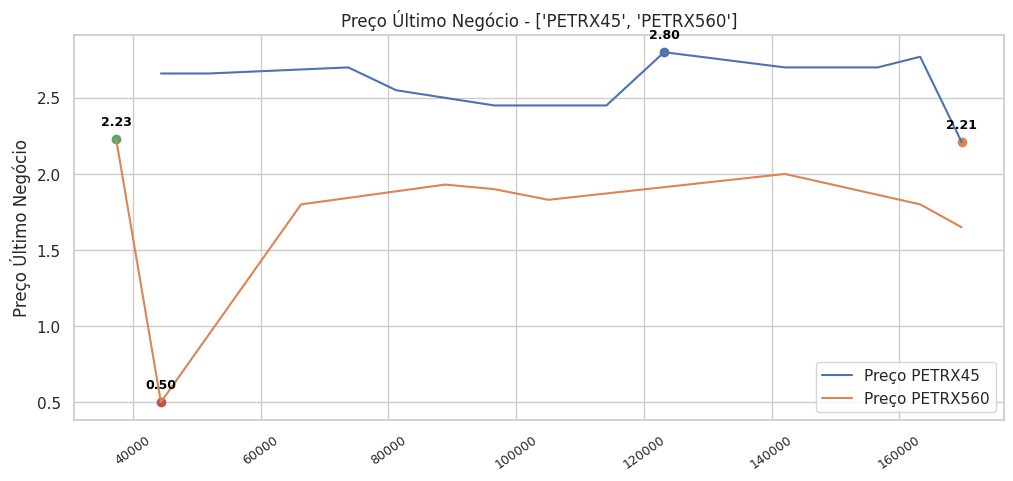

In [18]:
def plotar_grafico_multi_ativos(df, codigos_negociacao, incluir_tendencia=False):
    # Tratar os códigos de negociação para maiúsculas
    codigos_negociacao = [codigo.upper() for codigo in codigos_negociacao]
    # Filtrar o DataFrame pelos códigos de negociação
    df_codigos = df[df['cod_negociacao'].isin(codigos_negociacao)]

    # Configurar o estilo do seaborn para melhorar a aparência do gráfico
    sns.set(style="whitegrid")
    # Criar o gráfico
    plt.figure(figsize=(12, 5))

    # Adicionar os gráficos de linhas para cada ativo
    for codigo in codigos_negociacao:
        df_codigo = df_codigos[df_codigos['cod_negociacao'] == codigo]
        sns.lineplot(x=df_codigo.index, y='preco_ultimo_negocio', data=df_codigo, label=f'Preço {codigo}')

    # Adicionar rótulos e título
    plt.title(f'Preço Último Negócio - {codigos_negociacao}')
    plt.xlabel('')
    plt.ylabel('Preço Último Negócio')

    # Adicionar marcadores para ponto de máximo e mínimo para cada ativo
    for codigo in codigos_negociacao:
        df_codigo = df_codigos[df_codigos['cod_negociacao'] == codigo]
        max_index = df_codigo['preco_ultimo_negocio'].idxmax()
        min_index = df_codigo['preco_ultimo_negocio'].idxmin()

        max_value = df_codigo.loc[max_index, 'preco_ultimo_negocio']
        min_value = df_codigo.loc[min_index, 'preco_ultimo_negocio']

        plt.scatter(max_index, max_value, marker='o', label=f'Máximo {codigo}: {max_value:.2f}')
        plt.scatter(min_index, min_value, marker='o', label=f'Mínimo {codigo}: {min_value:.2f}')
        # Adicionar anotações de texto
        plt.annotate(f'{max_value:.2f}', (max_index, max_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')
        plt.annotate(f'{min_value:.2f}', (min_index, min_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')

    # plt.legend()
    plt.xticks(rotation=35, fontsize=9)
    # Exibir o gráfico
    plt.show()

# Exemplo de uso com até 4 ativos
# plotar_grafico_multi_ativos(opcoes, ['PETRX299', 'PETRX45', 'PETRX450', 'PETRX560'], incluir_tendencia=True)
plotar_grafico_multi_ativos(opcoes, ['PETRX45', 'PETRX560'], incluir_tendencia=True)
